In [9]:
source("~/Documents/R_packages/cat_regression_chains/RCG/funs_RCG.R")
library("bnlearn") 
library("ggm")
library("igraph")
library("mnormt")

## Example 1.3 - Lawyer’s ratings of state judges

In [10]:
library(datasets)
data(USJudgeRatings)
head(USJudgeRatings)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6


The variables `INTG` (judicial integrity), `DILG` (diligence) and `CONT` (number of contacts of lawyer with judge) are observed on 43 judges. The sample correlation is obtained.

In [11]:
R <- cor(USJudgeRatings[, c("INTG", "DILG", "CONT")])
round(R, 3)

,INTG,DILG,CONT
INTG,1.000,0.872,-0.133
DILG,0.872,1.000,0.012
CONT,-0.133,0.012,1.000


## Example 1.8 - Fiji Fertility Survey

Variables 
- `A`, Age
- `M` Age at first marriage 
- `E` Education 𝐸 (in completed years)
- `U` Residence  (urban = 1 or rural = 0), 
- `F` Fertility  (number of children ever born), 

observed on a sample of 774 married women of Fijian ethnicity, aged 35-49.


In [26]:
fiji <- read.csv("./data/fiji_data2.csv")
fijians <- fiji[fiji$I == 0,]
print(dim(fijians))
summary(fijians)

[1] 774   6


       F                A               M               E                I    
 Min.   : 0.000   Min.   :35.00   Min.   :10.00   Min.   : 0.000   Min.   :0  
 1st Qu.: 3.000   1st Qu.:38.00   1st Qu.:17.00   1st Qu.: 5.000   1st Qu.:0  
 Median : 6.000   Median :41.00   Median :19.00   Median : 6.000   Median :0  
 Mean   : 5.452   Mean   :41.06   Mean   :19.73   Mean   : 5.871   Mean   :0  
 3rd Qu.: 8.000   3rd Qu.:44.00   3rd Qu.:22.00   3rd Qu.: 7.000   3rd Qu.:0  
 Max.   :14.000   Max.   :49.00   Max.   :44.00   Max.   :20.000   Max.   :0  
       U         
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.2726  
 3rd Qu.:1.0000  
 Max.   :1.0000  

In [ ]:
## The Full regression graph 

In [21]:
gfull <- makeMG(dg = DAG(F ~ M+E+A+U, M ~ A + U,  E ~ A + U), 
                bg = UG(~ M*E +  A*U))
gfull

,F,M,E,A,U
F,0,0,0,0,0
M,1,0,100,0,0
E,1,100,0,0,0
A,1,1,1,0,100
U,1,1,1,100,0


Plot the graph 

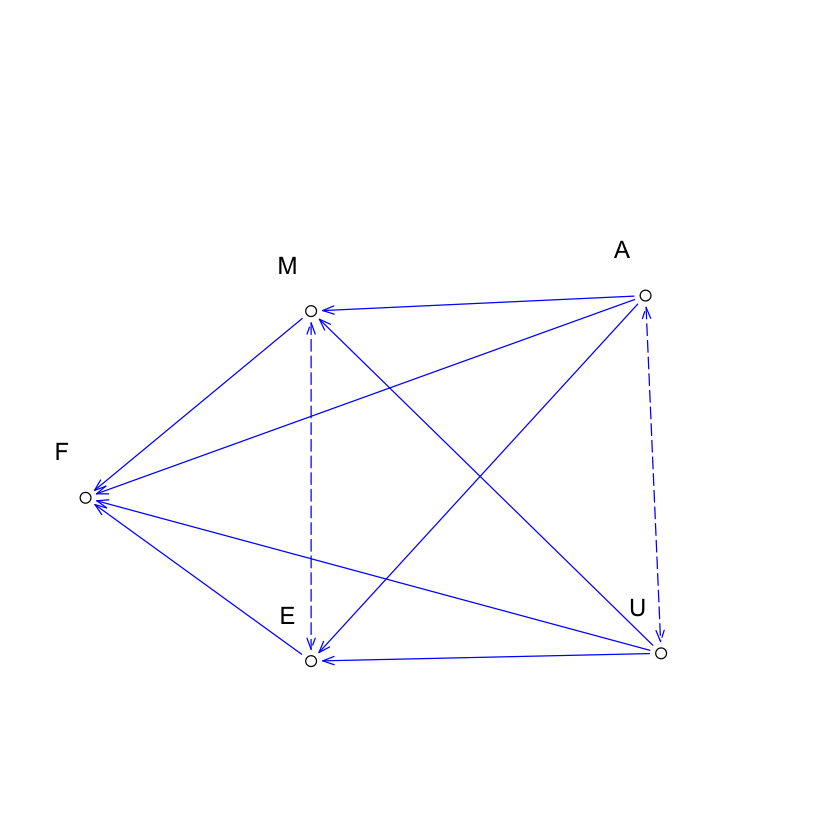

In [24]:
co = matrix(c(
 7, 40, 36, 64, 36, 19, 79, 66, 81, 20), byrow = TRUE, ncol = 2)
drawGraph(gfull, coor=co)

### Fit a regression model for fertility 

In [27]:
m <- lm(F ~ M + E + A + U, data = fijians)
summary(m)$coef

In [ ]:




```

### Path Analysis

```{r}
mq2 = lm(F ~ M + E + A + U , data = fiji2)
round(summary(mq2)$coef,3)
```

```{r}
mq3 = lm(F ~ M + E + U+ I+A, data = fiji2)
round(summary(mq3)$coef,3)
```

```{r}
mq4 = lm(F ~ M + E + U+ A, data = fiji2)
round(summary(mq4)$coef,3)
```

### Best model

```{r}
mq = lm(F ~ M  + E + U*I + A, data = fiji2)
round(summary(mq)$coef,3)
```

### Second equation (Bivariate regression)

```{r}
resp = list(~ M*E, ~ A*U*I)
regr = list(M ~ A + U + I,  E ~ A + U + I)
g = makeRCG(resp, regr)
coor =
  matrix(c(
    10, 90,
    10, 10,
    80, 90,
    80, 50,
    80, 10
  ), byrow = TRUE, ncol = 2)
g
drawGraph(g, coor = coor)
```

```{r}
S = cov(fiji2[, c("M", "E", "A", "I", "U")])
S
```

Fitting the multivariate regression graph

```{r}
out = fitAncestralGraph(g, S, 1703)
out
```

### Stratification

```{r}
fijian <- fiji2[fiji2$I == 0,-5]
indian <- fiji2[fiji2$I == 1,-5]

```

### Full graph

```{r}
gfull <- makeMG(dg = DAG(F ~ M+E+A+U, M ~ A + U,  E ~ A + U), 
                bg = UG(~ M*E +  A*U))
coor = matrix(c(
  7, 40,
  36, 64,
  36, 19,
  79, 66,
  81, 20
), byrow = TRUE, ncol = 2)
gfull
drawGraph(gfull, coor=coor)
```

### Indians

```{r}
ni = nrow(indian)
Si = cov(indian)
ord = c(1,3,4,2,5)
Si = Si[ord,ord]
outi = fitAncestralGraph(gfull, Si, ni)
outi
```

```{r}
summaryRCG(outi, n = ni)
```

### Reduced model Indians

```{r}

gred <- makeMG(dg = DAG(F ~ M+A+U, M ~  U,  E ~ A + U), 
               bg = UG(~ M*E + A*U))
gred <- gred[c(1,2,5,3,4), c(1,2,5,3,4)]
coor = matrix(c(
  7, 40,
  36, 64,
  36, 19,
  79, 66,
  81, 20
), byrow = TRUE, ncol = 2)
gred
drawGraph(gred, coor=coor)
```

### Fit reduced model for indians

```{r}
outired = fitAncestralGraph(gred, Si, ni)
outired
summaryRCG(outired, n = ni)
```

### Fit reduced model using `sem`

```{r}
library(sem)
red_mod_I = specifyModel(text="
M -> F, bFM, NA
A -> F, bFA, NA
U -> F, bFU, NA
U -> M, bMU, NA
U -> E, bEU, NA
A -> E, bEA, NA
A -> M, bMA, NA
F <-> F, oFF, NA
M <-> M, oMM, NA
M <-> E, oME, NA
E <-> E, oEE, NA
A <-> A, oAA, NA
A <-> U, oAU, NA
U <-> U, oUU, NA
")
mod_I=  sem(red_mod_I, Si, N = ni)
summary(mod_I)
```

### Data on Fijians

```{r}
nf = nrow(fijian)
Sf = cov(fijian)
ord = c(1,3,4,2,5)
Sf = Sf[ord,ord]
outf = fitAncestralGraph(gfull, Sf, nf)
outf
```

```{r}
summaryRCG(outf, n = nf)
```

### Fit using `sem` for Fijians

Saturated model

```{r}
sat_mod_F = specifyModel(text="
M -> F, bFM, NA
A -> F, bFA, NA
U -> F, bFU, NA
E -> F, bFE, NA

U -> M, bMU, NA
A -> M, bMA, NA

A -> E, bEA, NA
U -> E, bEU, NA

F <-> F, oFF, NA
M <-> M, oMM, NA
M <-> E, oME, NA
E <-> E, oEE, NA
A <-> A, oAA, NA
A <-> U, oAU, NA
U <-> U, oUU, NA
")
fit_sat_F =  sem(sat_mod_F, Sf, N = nf)
options(scipen = 10)
print(summary(fit_sat_F), digits = 3)
```

Reduced model

```{r}
red_mod_F = specifyModel(text="
M -> F, bFM, NA
A -> F, bFA, NA
U -> F, bFU, NA
U -> M, bMU, NA
A -> E, bEA, NA
F <-> F, oFF, NA
M <-> M, oMM, NA
M <-> E, oME, NA
E <-> E, oEE, NA
A <-> A, oAA, NA
# A <-> U, oAU, NA
U <-> U, oUU, NA
")
mod_F=  sem(red_mod_F, Sf, N = nf)
options(scipen = 0)
print(summary(mod_F), digits = 3)
```

### Data on Women's Labour-Force Participation

```{r}
library(car)
data(Womenlf)
wlf = cbind(Womenlf[,-2], hihigh = 0+(Womenlf$hincome > 14) )
wlf$partic =  0 + (wlf$partic == "fulltime")
wlf$hihigh = factor(wlf$hihigh)
wlf$hincome = Womenlf$hincome
```




## Test conditional independency

```{r}
wlf3 <- wlf[,c(2, 3,4)]
#hinc <- factor(0+(wlf$hincome <= median(wlf$hincome)))
#wlf_fact[,3] <- hinc 
ftable(region~  children + hihigh, table(wlf3)) 
```

```{r}
ci.test( "hihigh", "children", "region", data = wlf3, test = "mi")
```
### Mixed data 
```{r}
m1 = glm(partic ~ children*hihigh, family = binomial, data = wlf[,c(1,2,4)])
deviance(m1)
logLik(m1)
```
```{r}
ftable(partic ~ children+hihigh, data = wlf)
```

### Fit partic

```{r}
m1 = glm(partic ~ children + hihigh + region + 
           children:region  + hihigh:region, family = binomial, data = wlf)
round(summary(m1)$coef, 3)
```

```{r}
m1a = glm(partic ~ children + hihigh + region + 
            children:region, family = binomial, data = wlf)
m1b = glm(partic ~ children + hihigh + region, 
          family = binomial, data = wlf)
m1c = glm(partic ~ children + hihigh, 
          family = binomial, data = wlf)
anova(m1a, m1, test = "Chisq")
anova(m1b, m1a, test = "Chisq")
anova(m1c, m1b, test = "Chisq")
Anova(m1b)
```

```{r}
library(effects)
plot (allEffects (m1), ask=FALSE)
plot (allEffects (m1a), ask=FALSE)
plot (allEffects (m1b), ask=FALSE)
plot (allEffects (m1c), ask=FALSE)
```

```{r}
round(summary(m1a)$coef, 3)
round(summary(m1b)$coef, 3)
round(summary(m1c)$coef, 3)
```

### Fit children

```{r}
m2 = glm(children ~ hihigh + region, family = binomial, data = wlf)
round(summary(m2)$coef, 3)
Anova(m2)
```

### Fit hihigh

```{r}
m3 = glm(hihigh ~ region, family = binomial, data = wlf)
round(summary(m3)$coef, 3)
Anova(m3)
```

### Data

```{r}
r = levels(wlf$region)
for(j in r){
  w = wlf[wlf$region==j,c(1,2,4)]
  cat(j,"\n")
  print(as.data.frame(table(w)))
}
```

### Summary

```{r}
require(car)
m1 = glm(partic ~ children + hihigh + region, family = binomial, data = wlf)
round(summary(m1)$coef[,c(1,2,3)],2)
m10 = glm(partic ~ children + hihigh, family = binomial, data = wlf)
round(summary(m10)$coef[,c(1,2,3)],2)
anova(m10, m1)

m2 = glm(children ~ hihigh + region, family = binomial, data = wlf)
round(summary(m2)$coef[,c(1,2,3)],2)
m20 = glm(children ~ region, family = binomial, data = wlf)
round(summary(m20)$coef[,c(1,2,3)],2)
anova(m20, m2)

m3 = glm(hihigh ~ region, family = binomial, data = wlf)
round(summary(m3)$coef[,c(1,2,3)],2)
m30 = glm(hihigh ~ 1, family = binomial, data = wlf)
round(summary(m30)$coef[,c(1,2,3), drop = FALSE],2)
anova(m30, m3, test = "Chisq")

```

## Drop-out data

```{r}
drp <- read.table("dropout.txt", header = TRUE, stringsAsFactors = TRUE)
change <- drp[, c("B", "C", "D", "E", "F")]
change <- sapply(change, function(z) as.character((1+z)/2))
change <- as.data.frame(change, stringsAsFactors = TRUE)
tab <- table(change)
round(100 * prop.table(margin.table(tab, "B")), 2)
round(100 * prop.table(margin.table(tab, "C")), 2)
round(100 * prop.table(margin.table(tab, "D")), 2)
round(100 * prop.table(margin.table(tab, "E")), 2)
round(100 * prop.table(margin.table(tab, "F")), 2)
```

```{r}
margin.table(tab, c("E", "F"))
ci_test("E", "F", test = "mi", data = change)
```

```{r}
ci_test("D", "F", "E", test = "mi", data = change)
```
```{r}
ci_test("C", c("E", "F"), "D", test = "mi", data = change)
```
```{r}
ci_test("B", "C", c("D", "E", "F"), test = "mi", data = change)
```

```{r}
#| fig-width: 3
#| fig-height: 2.5
dag <- DAG(B~ D+E+F, D ~C+E, E~F)
co <-
  structure(c(9, 40, 62, 95, 68, 73, 44, 59, 80, 20), dim = c(5L, 
                                                              2L))
drawGraph(dag, coor = co, lwd = 1)
```
```{r}
ci_fact(dag)
```
```{r}
ci_test_DAG(dag, test = "mi", data = change)
```


## Lienert data 

```{r}
p <- c( 21, 2, 5, 13, 4, 11, 16, 1)
lienert <- cbind(expand.grid(X1 = c(0,1), X2 = c(0,1), X3 = c(0,1) ), Freq = p)
tab <- xtabs(Freq ~ ., lienert)
```

## Coppen data

```{r}
Freq <- c(15, 30, 9, 32, 23, 22, 14, 16,25,22,46,27,14,8,47,12)
X <- expand.grid(X2 = factor(1:2), X4 = factor(1:2), X1 = factor(1:2), X3 = c("y", "n"))
coppen <- cbind(X, Freq)
coppen_data <- tab2data(coppen)
```

```{r}
ci_test("X1", c("X3", "X4"), test = "mi", data = coppen_data)
ci_test("X4", c("X1", "X2"), test = "mi", data = coppen_data)
```



In [19]:
1:3

[1] 1 2 3